### 1. Load the dataset

**[1.1] Automatic reload modules**

In [59]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


**[1.2] Import packages**

In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**[1.3] Load the datasets**

In [61]:
df_train = pd.read_csv('../data/raw/train.csv', low_memory=False)
df_test = pd.read_csv('../data/raw/test.csv', low_memory=False)

### 2. Explore the data

**[2.1]] Display all columns and rows in dataframe**

In [62]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

**[2.2] Understand the data**

**Dimension**

In [63]:
print("Train:")
print(df_train.shape)

print("\nTest:")
print(df_test.shape)

Train:
(46618, 64)

Test:
(4970, 63)


**Descriptive statstics**

In [64]:
df_train.describe(include='all')

,team,conf,GP,Min_per,Ortg,usg,eFG,TS_per,ORB_per,DRB_per,AST_per,TO_per,FTM,FTA,FT_per,twoPM,twoPA,twoP_per,TPM,TPA,TP_per,blk_per,stl_per,ftr,yr,ht,num,porpag,adjoe,pfr,year,type,Rec_Rank,ast_tov,rimmade,rimmade_rimmiss,midmade,midmade_midmiss,rim_ratio,mid_ratio,dunksmade,dunksmiss_dunksmade,dunks_ratio,pick,drtg,adrtg,dporpag,stops,bpm,obpm,dbpm,gbpm,mp,ogbpm,dgbpm,oreb,dreb,treb,ast,stl,blk,pts,player_id,drafted
count,46618,46618,46618.000000,46618.000000,46618.000000,46618.000000,46618.000000,46618.000000,46618.000000,46618.000000,46618.000000,46618.000000,46618.000000,46618.000000,46618.000000,46618.000000,46618.000000,46618.000000,46618.000000,46618.000000,46618.000000,46618.000000,46618.000000,46618.000000,46326,46554,41939,46618.000000,46618.000000,46618.000000,46618.000000,46618,14337.000000,43151.000000,40860.000000,40860.000000,40860.000000,40860.000000,38119.000000,38050.000000,40860.000000,40860.000000,20400.000000,1207.000000,46576.000000,46576.000000,46576.000000,46576.000000,46576.000000,46576.000000,46576.000000,46576.000000,46582.000000,46576.000000,46576.000000,46582.000000,46582.000000,46582.000000,46582.000000,46582.000000,46582.000000,46582.000000,46618,46618.000000
unique,355,36,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7,38,80,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20377,NaN
top,Army,A10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Jr,7-Jun,1.0,NaN,NaN,NaN,NaN,all,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2336a719-c648-440c-821d-32fb0d9760bf,NaN
freq,176,1880,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12401,4615,1743,NaN,NaN,NaN,NaN,46618,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,NaN
mean,NaN,NaN,23.542988,37.339013,91.784360,18.164578,44.424392,47.571397,5.654071,12.575102,10.923008,20.535915,33.357909,47.887597,0.579193,41.521408,85.960444,0.424809,15.379274,44.595264,0.224779,1.877063,1.731048,38.111972,NaN,NaN,NaN,0.779567,89.277666,4.278710,2013.528036,NaN,53.217744,0.922210,27.779809,46.572614,14.853377,41.602619,0.562907,0.322901,3.774498,4.230470,0.866099,33.235294,103.364709,103.513641,1.427313,82.521563,-2.518313,-1.900248,-0.618064,-2.552051,16.949385,-2.088273,-0.463778,0.778630,1.867124,2.645755,1.066943,0.527743,0.283606,5.732429,NaN,0.009524
std,NaN,NaN,10.076829,28.019801,30.235568,6.181982,18.026404,17.217909,9.985025,11.041089,9.430012,12.210669,37.306108,50.190318,0.266445,43.820264,85.556152,0.191180,21.482081,57.557171,0.191479,6.271323,2.148502,36.821462,NaN,NaN,NaN,1.340548,30.669615,4.819912,2.873213,NaN,27.821187,0.691221,29.893780,47.108673,17.834037,45.221695,0.191550,0.170364,7.884873,8.631777,0.229589,16.624054,10.569908,11.405002,1.057080,65.092602,7.701851,5.186198,4.415293,8.305566,10.633054,6.160620,3.303826,0.745045,1.464894,2.096319,1.170469,0.469654,0.422755,4.942544,NaN,0.097127
min,NaN,NaN,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,-6.792410,-39.021300,0.000000,2009.000000,NaN,0.200000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,-1330.060000,-1292.020000,-0.857238,0.043033,-88.479400,-92.593500,-57.459400,-242.523000,0.000000,-141.539000,-100.984000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,0.000000
25%,NaN,NaN,17.000000,9.600000,83.900000,14.600000,40.000000,43.770000,1.900000,8.400000,4.600000,14.900000,4.000000,7.000000,0.500000,5.000000,13.000000,0.371000,0.000000,1.000000,0.000000,0.000000,0.900000,20.000000,NaN,NaN,NaN,-0.173758,79.

**[2.3] Remove unclear attributes**

* Since definitions of "ftr" and "pfr" are unclear, the attributes will be eliminated from the analysis.

In [65]:
df_train = df_train.drop(['ftr', 'pfr', 'num'], axis=1)
df_test = df_test.drop(['ftr', 'pfr', 'num'], axis=1)

**Display the unique values of the height of students**

In [66]:
df_train.ht.unique()

array(['2-Jun', '4-Jun', '8-Jun', '1-Jun', '5-Jun', 'Jun-00', '6-Jun',
       '9-Jun', '3-Jun', '11-Jun', '7-Jun', '10-May', '10-Jun', '11-May',
       '9-May', 'Jul-00', '7-May', '5-Jul', '8-May', '6-May', '2-Jul',
       '1-Jul', '-', '3-May', '3-Jul', 'Apr-00', '5-May', '4-Jul', nan,
       'So', 'Jr', 'Fr', "6'4", '4-May', '0', '1-May', '6-Jul', '5-Apr',
       '2-May'], dtype=object)

* Since attribute height consists of various invalid values, it will be removed from the set.

In [67]:
df_train = df_train.drop(['ht'], axis=1).reset_index(drop=True)
df_test = df_test.drop(['ht'], axis=1).reset_index(drop=True)

**Save a copy of data before cleaning**

In [68]:
df_train2 = df_train.copy()
df_test2 = df_test.copy()

**[2.4] Handle missing values**

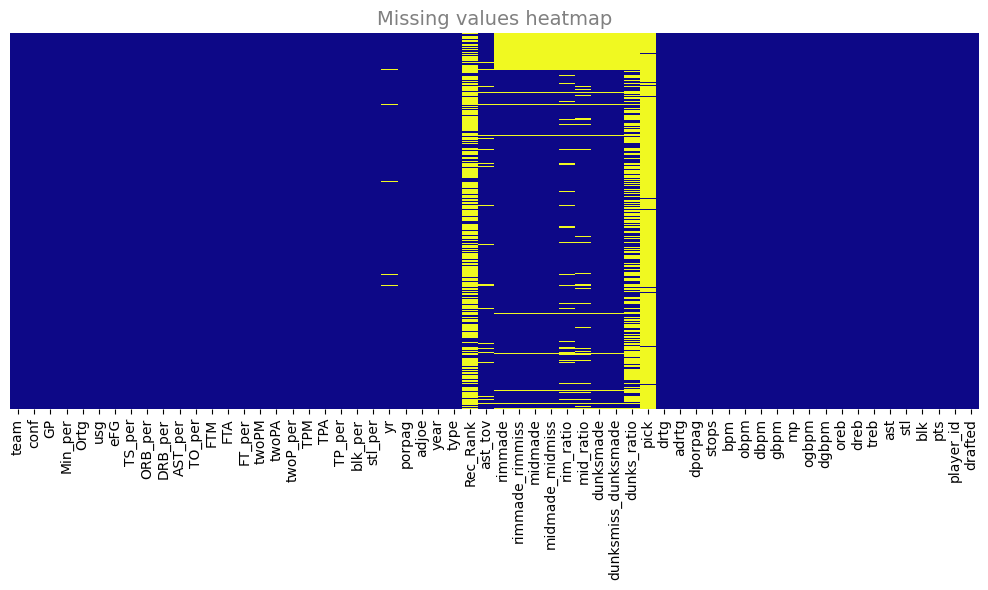

In [69]:
#Visualize by heatmap
plt.figure(figsize=(10,6))
sns.heatmap(df_train2.isnull(), yticklabels=False, xticklabels=True, cbar=False, cmap='plasma')
plt.xticks(rotation=90)
plt.title('Missing values heatmap', size=14, color='grey')
plt.tight_layout()
plt.show()

In [70]:
#Count missing values
num=df_train2.select_dtypes(include = np.number).columns
num2=df_test2.select_dtypes(include = np.number).columns

cnt = df_train2[num].isna().sum()
per = ((cnt/df_train2.shape[0])*100).round(4)

cnt2 = df_test2[num2].isna().sum()
per2 = ((cnt2/df_test2.shape[0])*100).round(4)

missing_cnt = pd.concat([per, per2], axis=1, keys=['Missing_Percent__train', 'Missing_Percent__test'])
missing_cnt.sort_values(['Missing_Percent__train', 'Missing_Percent__test'], ascending=False)

,Missing_Percent__train,Missing_Percent__test
pick,97.4109,99.0141
Rec_Rank,69.2458,71.1469
dunks_ratio,56.2401,54.6680
mid_ratio,18.3792,14.0241
rim_ratio,18.2312,12.9980
rimmade,12.3515,4.9899
rimmade_rimmiss,12.3515,4.9899
midmade,12.3515,4.9899
midmade_midmiss,12.3515,4.9899
dunksmade,12.3515,4.9899


* Since attributes dunks_ratio contain over 50% of missing values, the entire column will be dropped to avoid inappropriate imputation. Regarding pick and Rec_Rank, these features would be significant predictors. They will be replaced with zero and created binary features to distinguish.

In [71]:
df_train2 = df_train2.drop(['dunks_ratio'], axis=1)
df_test2 = df_test2.drop(['dunks_ratio'], axis=1)

**Pick and Rec_Rank - fill missing values and create encoded features**

In [72]:
df_train2['pick'] = df_train2['pick'].fillna(0)
df_test2['pick'] = df_test2['pick'].fillna(0)

df_train2['Rec_Rank'] = df_train2['Rec_Rank'].fillna(0)
df_test2['Rec_Rank'] = df_test2['Rec_Rank'].fillna(0)


df_train2['Picked'] = (df_train2['pick'] > 0).astype(int)
df_test2['Picked'] = (df_test2['pick'] > 0).astype(int)

df_train2['Recruited'] = (df_train2['Rec_Rank'] > 0).astype(int)
df_test2['Recruited'] = (df_test2['Rec_Rank'] > 0).astype(int)


**Fill other missing values with zeroes**

In [73]:
df_train2.fillna(0, inplace=True)
df_test2.fillna(0, inplace=True)
df_train2.shape

(46618, 61)

**Check if missing values are addressed**

In [74]:
num=df_train2.select_dtypes(include = np.number).columns
num2=df_test2.select_dtypes(include = np.number).columns

cnt = df_train2[num].isna().sum()
per = ((cnt/df_train2.shape[0])*100).round(4)

cnt2 = df_test2[num2].isna().sum()
per2 = ((cnt2/df_test2.shape[0])*100).round(4)

missing_cnt = pd.concat([per, per2], axis=1, keys=['Missing_Percent__train', 'Missing_Percent__test'])
missing_cnt.sort_values(['Missing_Percent__train', 'Missing_Percent__test'], ascending=False)
missing_cnt[missing_cnt['Missing_Percent__train']>0]

,Missing_Percent__train,Missing_Percent__test


**[2.5] Handling outliers**

**Use boxplots to detect outliers**

In [75]:
# num=features_train.select_dtypes(include = np.number).columns
# fig1 = px.box(features_train, x=num,
#              title='Feature Distribution', width=1000, height=1000)
# fig1.show()

df_train2.describe().round(2)

,GP,Min_per,Ortg,usg,eFG,TS_per,ORB_per,DRB_per,AST_per,TO_per,FTM,FTA,FT_per,twoPM,twoPA,twoP_per,TPM,TPA,TP_per,blk_per,stl_per,porpag,adjoe,year,Rec_Rank,ast_tov,rimmade,rimmade_rimmiss,midmade,midmade_midmiss,rim_ratio,mid_ratio,dunksmade,dunksmiss_dunksmade,pick,drtg,adrtg,dporpag,stops,bpm,obpm,dbpm,gbpm,mp,ogbpm,dgbpm,oreb,dreb,treb,ast,stl,blk,pts,drafted,Picked,Recruited
count,46618.00,46618.00,46618.00,46618.00,46618.00,46618.00,46618.00,46618.00,46618.00,46618.00,46618.00,46618.00,46618.00,46618.00,46618.00,46618.00,46618.00,46618.00,46618.00,46618.00,46618.00,46618.00,46618.00,46618.00,46618.00,46618.00,46618.00,46618.00,46618.00,46618.00,46618.00,46618.00,46618.00,46618.00,46618.00,46618.00,46618.00,46618.00,46618.00,46618.00,46618.00,46618.00,46618.00,46618.00,46618.00,46618.00,46618.00,46618.00,46618.00,46618.00,46618.00,46618.00,46618.00,46618.00,46618.00,46618.00
mean,23.54,37.34,91.78,18.16,44.42,47.57,5.65,12.58,10.92,20.54,33.36,47.89,0.58,41.52,85.96,0.42,15.38,44.60,0.22,1.88,1.73,0.78,89.28,2013.53,16.37,0.85,24.35,40.82,13.02,36.46,0.46,0.26,3.31,3.71,0.86,103.27,103.42,1.43,82.45,-2.52,-1.90,-0.62,-2.55,16.94,-2.09,-0.46,0.78,1.87,2.64,1.07,0.53,0.28,5.73,0.01,0.03,0.31
std,10.08,28.02,30.24,6.18,18.03,17.22,9.99,11.04,9.43,12.21,37.31,50.19,0.27,43.82,85.56,0.19,21.48,57.56,0.19,6.27,2.15,1.34,30.67,2.87,29.00,0.71,29.44,46.69,17.40,44.49,0.28,0.20,7.49,8.20,5.92,11.01,11.82,1.06,65.11,7.70,5.18,4.41,8.30,10.64,6.16,3.30,0.75,1.47,2.10,1.17,0.47,0.42,4.94,0.10,0.16,0.46
min,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-6.79,-39.02,2009.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-1330.06,-1292.02,-0.86,0.00,-88.48,-92.59,-57.46,-242.52,0.00,-141.54,-100.98,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,17.00,9.60,83.90,14.60,40.00,43.77,1.90,8.40,4.60,14.90,4.00,7.00,0.50,5.00,13.00,0.37,0.00,1.00,0.00,0.00,0.90,-0.17,79.15,2011.00,0.00,0.35,1.00,2.00,0.00,2.00,0.33,0.00,0.00,0.00,0.00,99.08,98.10,0.52,19.79,-5.40,-4.02,-2.28,-5.42,7.25,-4.46,-1.75,0.23,0.68,1.00,0.22,0.16,0.00,1.53,0.00,0.00,0.00
50%,28.00,35.90,97.00,18.10,47.50,50.72,4.50,11.80,9.10,19.30,20.00,32.00,0.66,27.00,60.00,0.46,4.00,17.00,0.27,0.80,1.50,0.39,94.50,2014.00,0.00,0.75,13.00,24.00,6.00,19.00,0.54,0.30,0.00,0.00,0.00,103.74,103.86,1.25,75.86,-1.82,-1.35,-0.57,-1.80,16.63,-1.58,-0.33,0.55,1.60,2.23,0.67,0.42,0.13,4.42,0.00,0.00,0.00
75%,31.00,62.20,106.80,21.80,53.00,55.95,8.20,15.90,15.20,24.70,51.00,74.00,0.75,65.00,136.00,0.52,24.00,73.00,0.36,2.50,2.20,1.49,106.51,2016.00,23.00,1.20,38.00,65.00,19.00,56.00,0.64,0.38,3.00,3.00,0.00,108.31,109.38,2.15,134.28,1.40,1.02,1.13,1.39,26.30,1.01,1.05,1.13,2.72,3.81,1.53,0.79,0.37,9.03,0.00,0.00,1.00
max,41.00,98.00,834.00,50.00,150.00,150.00,1576.60,1385.00,100.00,100.00,312.00,374.00,1.00,311.00,615.00,1.00,147.00,394.00,1.00,1072.00,128.30,8.66,678.94,2018.00,100.00,12.00,238.00,358.00,222.00,532.00,1.00,1.00,122.00,132.00,60.00,131.46,144.68,5.80,360.57,685.31,162.00,523.32,269.51,50.00,225.48,78.99,5.93,11.55,14.53,10.00,4.00,5.26,29.97,1.00,1.00,1.00


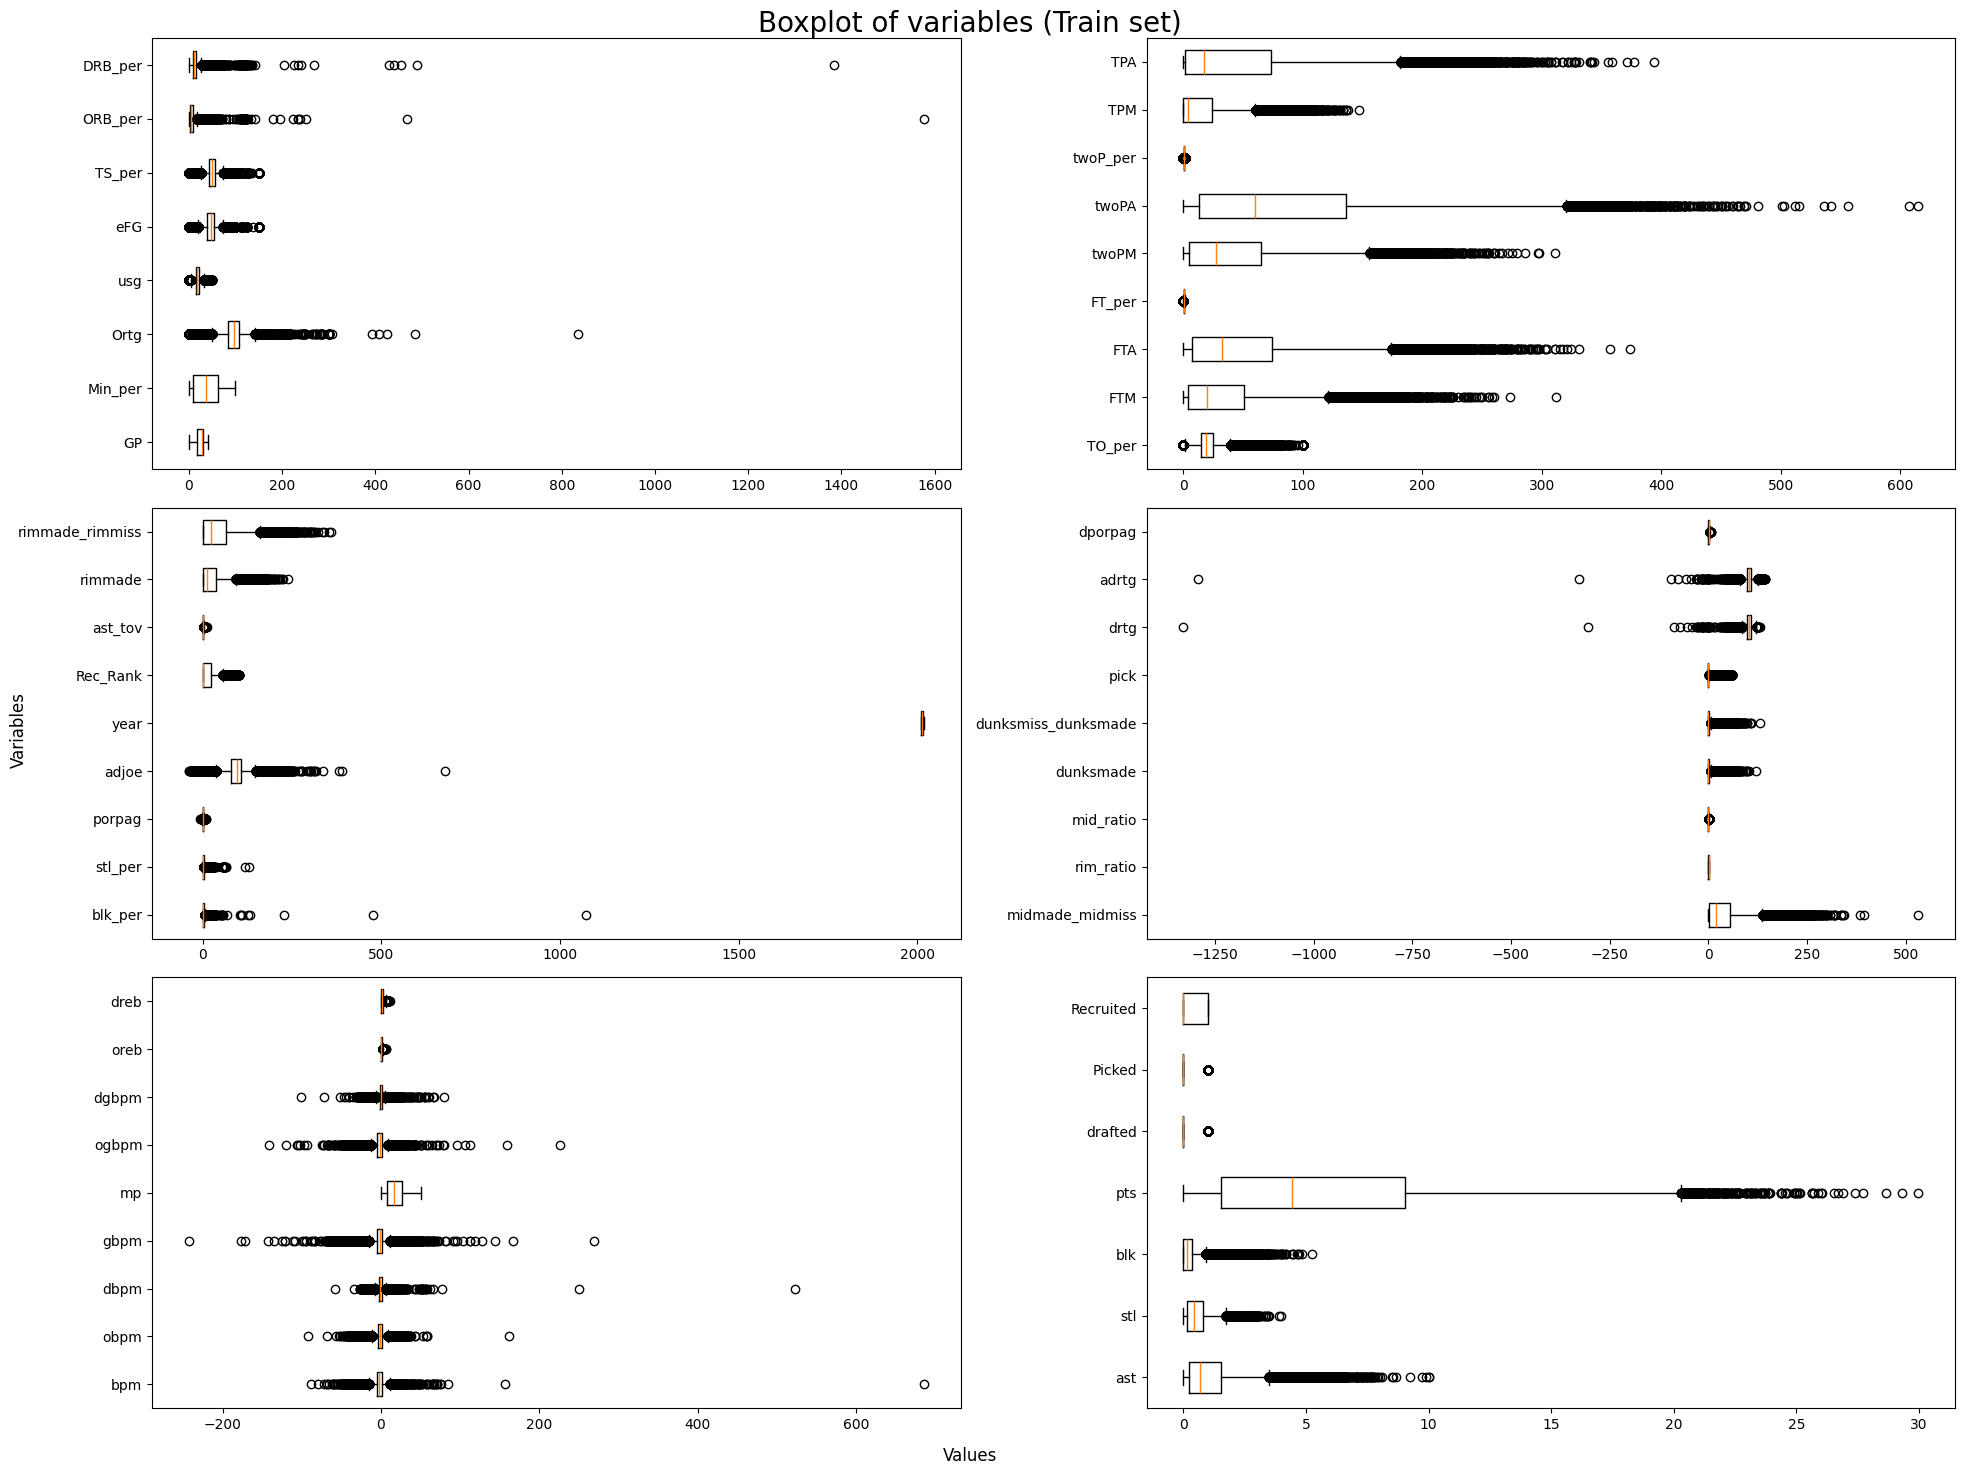

In [76]:
#Iterate the list of variables to plot boxplots
numvar = df_train2.select_dtypes(include = np.number).columns
var_range = [(0, 8), (9, 18), (19, 28), (29, 38), (39, 48), (49, 60)]

fig, axes = plt.subplots(3, 2, figsize=(20,15))

for i, (a,b) in enumerate(var_range):
    var = numvar[a:b]
    data = [df_train2[col].dropna().values for col in var]
    ax = axes[i//2, i%2]
    ax.boxplot(data, vert=False, tick_labels=var)

fig.suptitle(f'Boxplot of variables (Train set)', size=20)
fig.supxlabel('Values')
fig.supylabel('Variables')
plt.tight_layout()
plt.show()


* Obviously, outliers are detected across multiple variables. Extreme outliers will highly distort the model performance and predictability, therefore they will be addressed by IQR method.

**Handling Outliers with IQR method**

In [77]:
#Train set
var = ['ORB_per', 'DRB_per', 'blk_per', 'drtg', 'adrtg']

for col in var:
    Q1 = df_train2[col].quantile(0.25)
    Q3 = df_train2[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df_train2 = df_train2[(df_train2[col] >= lower_bound) & (df_train2[col] <= upper_bound)]

df_train2.describe(include='all')

,team,conf,GP,Min_per,Ortg,usg,eFG,TS_per,ORB_per,DRB_per,AST_per,TO_per,FTM,FTA,FT_per,twoPM,twoPA,twoP_per,TPM,TPA,TP_per,blk_per,stl_per,yr,porpag,adjoe,year,type,Rec_Rank,ast_tov,rimmade,rimmade_rimmiss,midmade,midmade_midmiss,rim_ratio,mid_ratio,dunksmade,dunksmiss_dunksmade,pick,drtg,adrtg,dporpag,stops,bpm,obpm,dbpm,gbpm,mp,ogbpm,dgbpm,oreb,dreb,treb,ast,stl,blk,pts,player_id,drafted,Picked,Recruited
count,41252,41252,41252.000000,41252.000000,41252.000000,41252.000000,41252.000000,41252.000000,41252.000000,41252.000000,41252.000000,41252.000000,41252.000000,41252.000000,41252.000000,41252.000000,41252.000000,41252.000000,41252.000000,41252.000000,41252.000000,41252.000000,41252.000000,41252,41252.000000,41252.000000,41252.000000,41252,41252.000000,41252.000000,41252.000000,41252.000000,41252.000000,41252.000000,41252.000000,41252.000000,41252.000000,41252.000000,41252.000000,41252.000000,41252.000000,41252.000000,41252.000000,41252.000000,41252.000000,41252.000000,41252.000000,41252.000000,41252.000000,41252.000000,41252.000000,41252.000000,41252.000000,41252.000000,41252.000000,41252.000000,41252.000000,41252,41252.000000,41252.000000,41252.000000
unique,355,36,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18814,NaN,NaN,NaN
top,Penn,A10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Jr,NaN,NaN,NaN,all,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2336a719-c648-440c-821d-32fb0d9760bf,NaN,NaN,NaN
freq,153,1616,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11093,NaN,NaN,NaN,41252,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,NaN,NaN,NaN
mean,NaN,NaN,24.299161,39.256860,92.490049,18.173398,44.892318,48.128758,4.899195,11.610557,11.446424,20.598252,34.923228,49.638708,0.601121,42.189591,88.287525,0.427854,17.115194,49.539150,0.242392,1.308092,1.688522,NaN,0.814157,90.032910,2013.522472,NaN,16.188922,0.913426,24.458935,41.471250,13.482013,37.853583,0.464933,0.269828,2.821512,3.177131,0.787647,104.244484,104.344029,1.459422,85.149436,-2.574979,-1.679607,-0.895372,-2.596511,17.707414,-1.959568,-0.636943,0.754289,1.874903,2.629193,1.155829,0.557080,0.223954,5.995648,NaN,0.008194,0.023393,0.307767
std,NaN,NaN,9.494066,27.753909,27.843269,5.850791,16.528155,15.804397,3.809343,5.367801,8.910450,11.363886,37.596472,50.115691,0.252748,42.831211,84.471458,0.177666,22.102885,58.948346,0.183584,1.500078,1.165122,NaN,1.356163,28.428620,2.874405,NaN,28.736758,0.707463,28.631793,45.945844,17.407408,44.578377,0.268293,0.192743,6.343100,6.977637,5.676579,6.286161,7.601610,1.030778,63.464455,5.994355,4.507662,2.651065,7.213741,10.482472,5.498762,2.525168,0.707690,1.400674,1.993278,1.199453,0.472657,0.285170,4.951072,NaN,0.090148,0.151149,0.461575
min,NaN,NaN,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,-6.792410,-39.021300,2009.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,86.636400,82.975800,0.002508,0.043486,-60.047800,-43.195100,-26.661400,-142.114000,0.000000,-106.262000,-40.672400,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,0.000000,0.000000,0.000000
25%,NaN,NaN,19.000000,12.800000,84.900000,14.700000,40.600000,44.367500,1.800000,8.200000,5.400000,15.200000,5.000000,9.000000,0.517000,7.000000,17.000000,0.376000,0.000000,2.000000,0.000000,0.000000,1.000000,NaN,-0.160305,80.199725,2011.000000,NaN,0.000000,0.428587,1.000000,3.000000,1.000000,3.000000,0.360000,0.111100,0.000000,0.000000,0.000000,99.952050,99.022450,0.588523,25.67

### 3. Explore variables

**[3.1] Target variable**

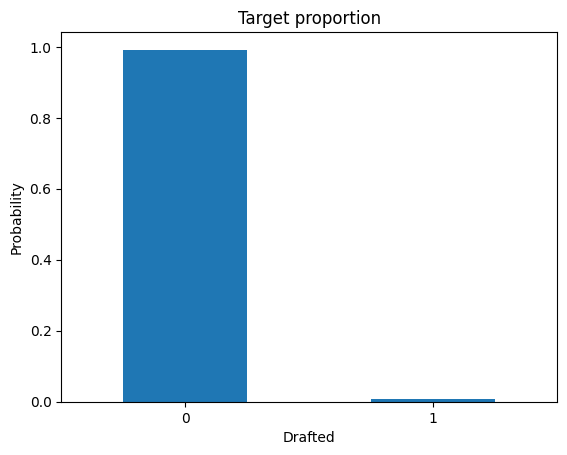

In [78]:
draft_prob = df_train2.drafted.value_counts(normalize=True)
fig, ax = plt.subplots()
draft_prob.plot(kind='bar', ax=ax).set_title('Target proportion')
ax.set_xlabel('Drafted')
ax.set_ylabel('Probability')
ax.set_xticklabels([0,1], rotation=0)
ax.grid(False)
plt.show()

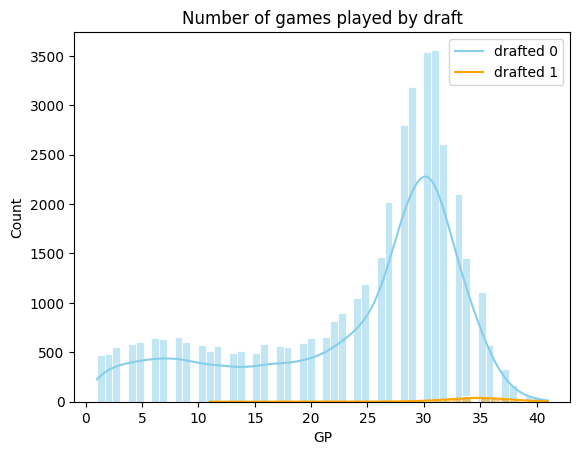

In [79]:
#Games played by year
ax=sns.histplot(df_train2['GP'][df_train2['drafted']==0], edgecolor='white', kde=True, color='skyblue')
ax=sns.histplot(df_train2['GP'][df_train2['drafted']==1], edgecolor='white', kde=True, color='orange')
ax.legend(['drafted 0', 'drafted 1'])
ax.set_title('Number of games played by draft')
plt.show()

* Players who played more games seem to have higher chances of being drafted.

Text(0.5, 1.0, 'Minutes played by by draft')

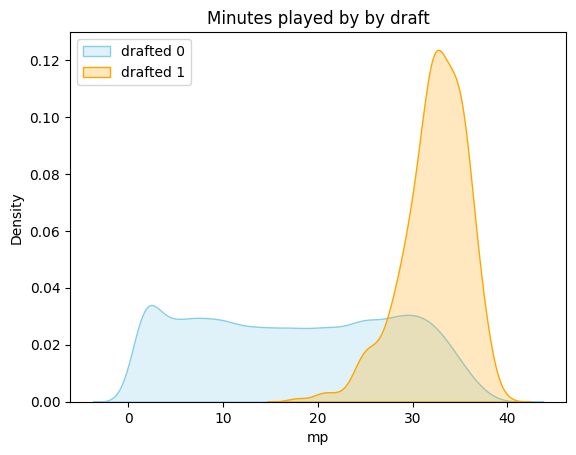

In [80]:
ax=sns.kdeplot(df_train2['mp'][df_train2['drafted']==0], color='Skyblue', fill=True)
ax=sns.kdeplot(df_train2['mp'][df_train2['drafted']==1], color='Orange', fill=True)
ax.legend(['drafted 0', 'drafted 1'])
ax.set_title('Minutes played by by draft')

* Players who played more minutes in the season tend to have higher chances of being drafted.

**Categorical variables**

In [81]:
df_train2['type'].value_counts()

type
all    41252
Name: count, dtype: int64

**Count unique values of student's year of study**

In [82]:
df_train2['yr'].value_counts()

yr
Jr      11093
Fr      10689
So       9687
Sr       9593
0         185
0           3
57.1        1
42.9        1
Name: count, dtype: int64

* There is only one 'type' in the dataset. In other words, it is not useful for prediction and, therefore, will be dropped.
* Regarding the student's year of study ('yr'), some numeric values were found in the data, which are invalid in this categorical variable. As the proportion is relatively small, those rows will be eliminated.

**Drop attribute 'type'**

In [83]:
df_train2 = df_train2.drop(['type'], axis=1)
df_test2 = df_test2.drop(['type'], axis=1)

**Remove invalid values existing in student's year of study**

In [84]:
#Transform 'yr' type to string and filter the invalid values
df_train2['yr'] = df_train2['yr'].astype(str)
df_test2['yr'] = df_test2['yr'].astype(str)

#Fill missing values 
df_train2['yr'] = df_train2['yr'].replace(['nan', '0', '57.1', '42.9'], np.nan)
df_train2['yr'] = df_train2['yr'].ffill()
df_test2['yr'] = df_test2['yr'].replace(['nan', '0'], np.nan)
df_test2['yr'] = df_test2['yr'].ffill()

In [85]:
print("Train:", df_train.shape)
print("Test:", df_test.shape)

Train: (46618, 60)
Test: (4970, 59)


**Check if the invalid values are addressed**

In [86]:
print("Train:\n", df_train2['yr'].value_counts())
print("\nTest:\n", df_test2['yr'].value_counts())

Train:
 yr
Jr    11143
Fr    10783
So     9708
Sr     9618
Name: count, dtype: int64

Test:
 yr
Fr    1328
Jr    1318
So    1233
Sr    1091
Name: count, dtype: int64


### 4. Prepare Data

**[4.1] Create a copy of dataframe**

In [87]:
df_train_cleaned = df_train2.copy()
df_test_cleaned = df_test2.copy()

**[4.2] Extract the target from dataframe**

In [88]:
y_data = df_train_cleaned.pop('drafted')

In [89]:
#Frequency of target variable
y_data.value_counts(normalize=True)

drafted
0.0    0.991806
1.0    0.008194
Name: proportion, dtype: float64

**[4.3] Create a list of numeric and categorical variables respectively**

In [90]:
num_cols = list(df_train_cleaned.select_dtypes('number').columns)
cat_cols = list(set(df_train_cleaned.columns) - set(num_cols))

num_cols2 = list(df_test_cleaned.select_dtypes('number').columns)
cat_cols2 = list(set(df_test_cleaned.columns) - set(num_cols2))

**[4.4] Import scaler and encoding**

In [91]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder

**[4.65 Encoding categorical variable**

In [92]:
ohe = OneHotEncoder(sparse_output=False, drop='first')

#Transform the column
features_train = ohe.fit_transform(df_train_cleaned[['yr']])
features_test = ohe.transform(df_test_cleaned[['yr']])

In [93]:
#Convert to dataframes
features_train = pd.DataFrame(features_train, columns=ohe.get_feature_names_out())
features_test = pd.DataFrame(features_test, columns=ohe.get_feature_names_out())

**[4.6] Scaling and fit transform numeric features**

In [94]:
scaler = StandardScaler()

In [95]:
#Fit transform
features_train[num_cols] = scaler.fit_transform(df_train_cleaned[num_cols])
features_test[num_cols2] = scaler.transform(df_test_cleaned[num_cols2])

### 5. Split the dataset

In [96]:
X_train = features_train
X_test = features_test

**Import package and split the data**

In [97]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X_train, y_data, test_size=0.2, random_state=8)

**Dimension**

In [98]:
print(X_train.shape)
print(X_val.shape)
print(X_test.shape)

(33001, 58)
(8251, 58)
(4970, 58)


**Target proportion**

In [99]:
print(y_train.value_counts(normalize=True))
print(y_val.value_counts(normalize=True))

drafted
0.0    0.991758
1.0    0.008242
Name: proportion, dtype: float64
drafted
0.0    0.992001
1.0    0.007999
Name: proportion, dtype: float64


**Save the processed data**

In [100]:
X_train.to_csv('../data/processed/X_train.csv', index=False)
X_val.to_csv('../data/processed/X_val.csv', index=False)
X_test.to_csv('../data/processed/X_test.csv', index=False)
y_train.to_csv('../data/processed/y_train.csv', index=False)
y_val.to_csv('../data/processed/y_val.csv', index=False)

### 6. Train RandomForest - Hyperparameter Tuning with RandomSearchCV

**[6.1] Instantiate and fit the model**

In [101]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=8)

**[6.2] Parameters dictionary**

In [102]:
from scipy.stats import randint

param_ran = {
    'n_estimators': randint(5, 100),
    'max_depth': randint(5, 40),
    'min_samples_leaf': randint(10, 100),
    'max_features': randint(2, 30)
}

**[6.3] Instantiate and fit the hyperparameters wit Stratified KFold**

In [103]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=8)
ransearch = RandomizedSearchCV(rf, param_ran, cv=skf, random_state=8)

In [104]:
ransearch.fit(X_train, y_train)

C:\Users\ting_\AppData\Local\pypoetry\Cache\virtualenvs\at1-kaggle-group12-lV0VH6Hd-py3.11\Lib\site-packages\numpy\ma\core.py:2846: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=8, shuffle=True),
                   estimator=RandomForestClassifier(random_state=8),
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000002771D00E710>,
                                        'max_features': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000002771D00DD90>,
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000002771D00E250>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000002771D00E950>},
                   random_state=8)

**[6.4] Display the best set of parameters**

In [105]:
ransearch.best_params_

{'max_depth': 8,
 'max_features': 22,
 'min_samples_leaf': 15,
 'n_estimators': 95}

**[6.5] Evaluation metrics for hyperparameters**

In [106]:
ransearch.best_score_

np.float64(0.9956061753728773)

In [107]:
print("RanCV_Train:", f'{ransearch.score(X_train, y_train):.4f}')
print("RanCV_val:", f'{ransearch.score(X_val, y_val):.4f}')

RanCV_Train: 0.9972
RanCV_val: 0.9961


**[6.6] Make prediction on training data**

In [108]:
y_train_pred = ransearch.best_estimator_.predict_proba(X_train)[:, 1]
y_val_pred = ransearch.best_estimator_.predict_proba(X_val)[:, 1]

**[6.7] Performance metric - AUROC**

In [109]:
from sklearn.metrics import roc_auc_score, roc_curve, auc

In [110]:
print("Train - AUROC:\n", f'{roc_auc_score(y_train, y_train_pred):.4f}')
print("Val - AUROC:\n", f'{roc_auc_score(y_val, y_val_pred):.4f}')

Train - AUROC:
 0.9994
Val - AUROC:
 0.9985


**Plot the AUROC curve**

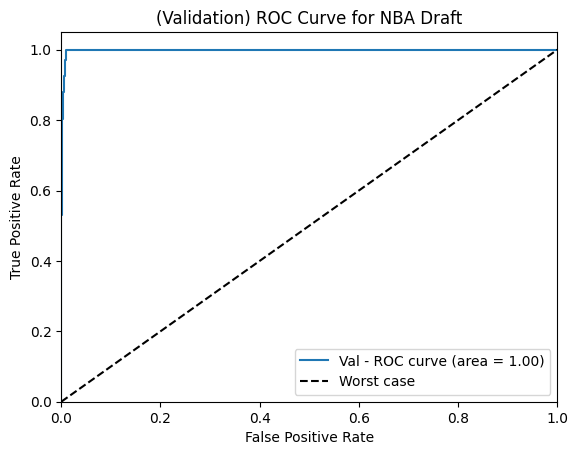

In [111]:
fpr, tpr, thresholds = roc_curve(y_val, y_val_pred) 
roc_auc = auc(fpr, tpr)
plt.figure()  
plt.plot(fpr, tpr, label='Val - ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--', label='Worst case')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('(Validation) ROC Curve for NBA Draft')
plt.legend()
plt.show()

**[6.8] Predict on test data**

In [112]:
y_test_pred = ransearch.best_estimator_.predict_proba(X_test)[:, 1]

#Dataframe for pred result
y_test = df_test_cleaned[['player_id']].copy()
y_test.to_csv('../data/interim/y_test.csv', index=False)
y_pred = y_test
y_pred.loc[:, 'drafted'] = y_test_pred

print(y_pred.describe().round(5))

y_pred = pd.DataFrame(y_pred)

#Save the result to CSV file
y_pred.to_csv('../data/external/at1_pred_week2.csv', index=False)

          drafted
count  4970.00000
mean      0.00390
std       0.04527
min       0.00000
25%       0.00000
50%       0.00000
75%       0.00000
max       0.91286


### 7. Feature Importance

In [113]:
feature = ransearch.best_estimator_.feature_importances_

In [114]:
#Dataframe of feature importance
feat_imp_rf_df = pd.DataFrame(
    {'feature': X_train.columns,
     'feature_importance': feature})

In [115]:
#Sort the dataframe
feat_imp_rf_df = feat_imp_rf_df.sort_values('feature_importance', ascending=False).reset_index(drop=True)
feat_imp_rf_df

,feature,feature_importance
0,Picked,0.246323
1,pick,0.225608
2,yr_Sr,0.083973
3,porpag,0.080430
4,dporpag,0.058279
5,Rec_Rank,0.043894
6,pts,0.041299
7,stops,0.027420
8,twoPA,0.018425
9,twoPM,0.015662


In [116]:
#Visualize the feature importance
import altair as alt

alt.Chart(feat_imp_rf_df).mark_bar().encode(
    x='feature_importance',
    y=alt.Y("feature", sort='-x'),
    tooltip=['feature','feature_importance']
)

alt.Chart(...)

* Only the more significant features will be maintained in the next experiment to address overfitting and see if the model's performance will improve.